In [1]:
#~~~~~~~~~ Analyzing Crime in Los Angeles ~~~~~~~~~#

# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
#crimes.head()

The highest frequency of crimes is during 12 o'clock.


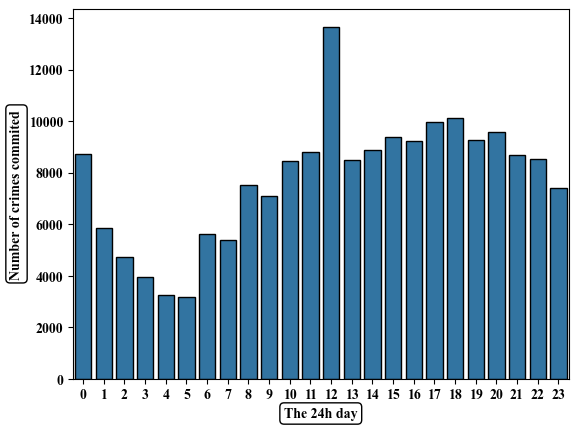

    HOUR OCC  count
9          0   8728
17         1   5836
20         2   4726
21         3   3943
22         4   3238
23         5   3171
18         6   5621
19         7   5403
14         8   7523
16         9   7092
13        10   8440
8         11   8787
0         12  13663
12        13   8474
7         14   8872
4         15   9393
6         16   9224
2         17   9964
1         18  10125
5         19   9262
3         20   9579
10        21   8701
11        22   8531
15        23   7419


In [5]:
#1. Which hour has the highest frequency of crimes? 
#Store as an integer variable called peak_crime_hour.


def military_to_readable(military_time):
    '''Take a military time as input and convert it to 24-hour format'''
    # Extract hour component from military time
    hour = int(military_time[:2])

    # Convert hour to 24-hour format
    if hour == 0:
        readable_hour = 00
    elif hour == 12:
        readable_hour = 12
    else:
        readable_hour = hour

    # Format the readable time
    readable_time = f"{readable_hour}"
    return readable_time


#Create a new column in the crimes df with only the number of the HOUR that a crime commited
crimes['HOUR OCC'] = [military_to_readable(i) for i in crimes['TIME OCC']]

#Find the HOUR that has the most appearences at the 'HOUR OCC' column
peak_crime_hour_df = crimes['HOUR OCC'].value_counts().astype(int).reset_index()
peak_crime_hour = peak_crime_hour_df.iloc[0,0]
print(f"The highest frequency of crimes is during {peak_crime_hour} o'clock.")

#Plot the results
peak_crime_hour_df['HOUR OCC'] = peak_crime_hour_df['HOUR OCC'].astype(int)
peak_crime_hour_df = peak_crime_hour_df.sort_values('HOUR OCC', ascending=True)
sns.barplot(data=peak_crime_hour_df, x='HOUR OCC', y='count', edgecolor='black')
plt.ylabel('Number of crimes commited',
           fontname='Times New Roman',
           fontweight='bold', 
           bbox=dict(facecolor='white', 
                     edgecolor='black', 
                     boxstyle='round'))
plt.xlabel('The 24h day',
           fontname='Times New Roman',
           fontweight='bold', 
           bbox=dict(facecolor='white', 
                     edgecolor='black', 
                     boxstyle='round'))
plt.xticks(fontname='Times New Roman',
           fontweight='bold')
plt.yticks(fontname='Times New Roman',
           fontweight='bold')
plt.show()

print(peak_crime_hour_df)

The area that has the largest frequency of night crimes is Central.


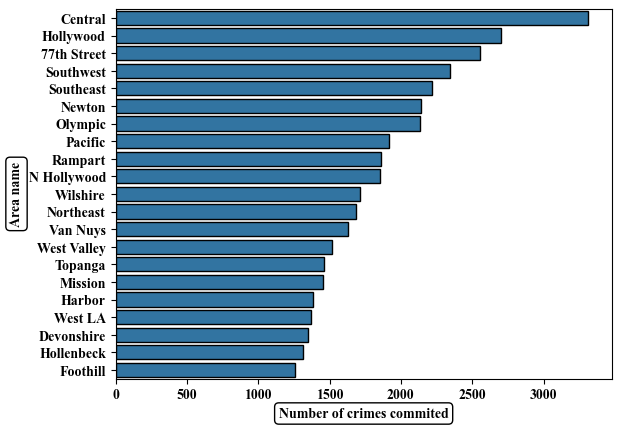

In [ ]:
#2.Which area has the largest frequency of night crimes 
#(crimes committed between 10pm and 3:59am)? 
#Save as a string variable called peak_night_crime_location.

#Categorize the HOUR OCC column as night and day hours
crimes['HOUR OCC'] = crimes['HOUR OCC'].astype(int)
crimes['DAY_NIGHT'] = np.where((crimes['HOUR OCC']>=4) & (crimes['HOUR OCC']<22), 'Day', 'Night')

#Find the area with the most night crimes
#Subset only for night crimes
night_crimes = crimes[crimes['DAY_NIGHT'] == 'Night']

#Find peak_night_crime_location and print the results
area_count = night_crimes['AREA NAME'].value_counts().reset_index()
peak_night_crime_location = area_count.iloc[0,0]
print(f"The area that has the largest frequency of night crimes is {peak_night_crime_location}.")

#Plot the results
sns.barplot(data=area_count, x='count', y='AREA NAME', edgecolor='black')
plt.xlabel('Number of crimes commited',
           fontname='Times New Roman',
           fontweight='bold', 
           bbox=dict(facecolor='white', 
                     edgecolor='black', 
                     boxstyle='round'))
plt.ylabel('Area name',
           fontname='Times New Roman',
           fontweight='bold', 
           bbox=dict(facecolor='white', 
                     edgecolor='black', 
                     boxstyle='round'))
plt.xticks(fontname='Times New Roman',
           fontweight='bold')
plt.yticks(fontname='Times New Roman',
           fontweight='bold')
plt.show()


Age Group
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: count, dtype: int64


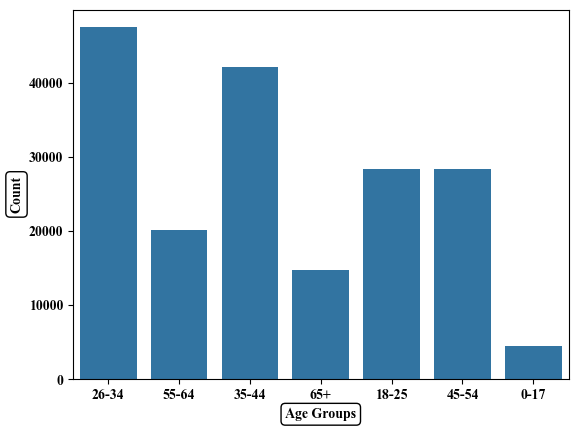

In [ ]:
#3.Identify the number of crimes committed against victims of 
#different age groups.
#Save as a pandas Series called victim_ages,
#with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" 
# as the index and the frequency of crimes as the values. 

#Unlock new feature for Vict Age with the method of Generating New Features
#List of conditions to use as input on np.select()
conditions = [
    (crimes['Vict Age']<=17),
    ((crimes['Vict Age']>=18) & (crimes['Vict Age']<=25)),
    ((crimes['Vict Age']>=26) & (crimes['Vict Age']<=34)),
    ((crimes['Vict Age']>=35) & (crimes['Vict Age']<=44)),
    ((crimes['Vict Age']>=45) & (crimes['Vict Age']<=54)),
    ((crimes['Vict Age']>=55) & (crimes['Vict Age']<=64))
]

#List of the variable new feature
choices = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64"]

#Use of np.select()
crimes['Age Group'] = np.select(conditions, choices, default='65+')

#Find the number of crimes committed against victims of different age groups
victim_ages = crimes['Age Group'].value_counts()
print(victim_ages)

#Plot the results
sns.countplot(data=crimes, x='Age Group')
plt.xlabel('Age Groups',
           fontname='Times New Roman',
           fontweight='bold', 
           bbox=dict(facecolor='white', 
                     edgecolor='black', 
                     boxstyle='round'))
plt.ylabel('Count',
           fontname='Times New Roman',
           fontweight='bold', 
           bbox=dict(facecolor='white', 
                     edgecolor='black', 
                     boxstyle='round'))
plt.xticks(fontname='Times New Roman',
           fontweight='bold')
plt.yticks(fontname='Times New Roman',
           fontweight='bold')

plt.show()
